In [1]:
from mxnet import ndarray as nd
from mxnet import autograd
from mxnet import gluon

num_train = 20
num_test = 100
num_inputs = 200

In [2]:
true_w = nd.ones((num_inputs, 1)) * 0.01
true_b = 0.05

In [3]:
X = nd.random.normal(shape=(num_train + num_test, num_inputs))
y = nd.dot(X, true_w)
y += .01 * nd.random.normal(shape=y.shape)

X_train, X_test = X[:num_train, :], X[num_train:, :]
y_train, y_test = y[:num_train], y[num_train:]

In [4]:
import random
batch_size = 1
def data_iter(num_examples):
    idx = list(range(num_examples))
    random.shuffle(idx)
    for i in range(0, num_examples, batch_size):
        j = nd.array(idx[i:min(i+batch_size,num_examples)])
        yield X.take(j), y.take(j)

In [5]:
def get_params():
    w = nd.random.normal(shape=(num_inputs, 1))*0.1
    b = nd.zeros((1,))
    for param in (w, b):
        param.attach_grad()
    return (w, b)

In [6]:
def L2_penalty(w, b):
    return (w**2).sum() + b**2

In [7]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt

def net(X, lambd, w, b):
    return nd.dot(X, w) + b

def square_loss(yhat, y):
    return (yhat - y.reshape(yhat.shape)) ** 2

def SGD(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

def test(params, X, y):
    return square_loss(net(X, 0, *params), y).mean().asscalar()

def train(lambd):
    epochs = 10
    learning_rate = 0.002
    params = get_params()
    train_loss = []
    test_loss = []
    for e in range(epochs):
        for data, label in data_iter(num_train):
            with autograd.record():
                output = net(data, lambd, *params)
                loss = square_loss(
                    output, label) + lambd * L2_penalty(*params)
            loss.backward()
            SGD(params, learning_rate)
        train_loss.append(test(params, X_train, y_train))
        test_loss.append(test(params, X_test, y_test))
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.legend(['train','test'])
    plt.show()
    return 'learned w[:10]:', params[0][:10], 'learend b:', params[1]

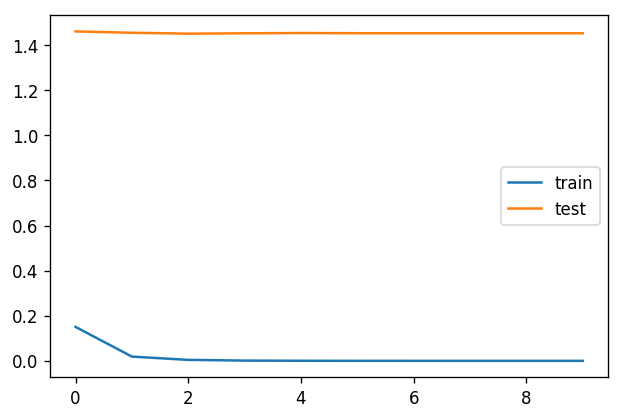

('learned w[:10]:', 
 [[ 0.03795235]
  [ 0.06873193]
  [ 0.06907976]
  [ 0.01794148]
  [ 0.05762393]
  [ 0.09155954]
  [-0.02598207]
  [-0.15013002]
  [-0.09126656]
  [ 0.05192928]]
 <NDArray 10x1 @cpu(0)>, 'learend b:', 
 [-0.03268098]
 <NDArray 1 @cpu(0)>)

In [8]:
train(0)

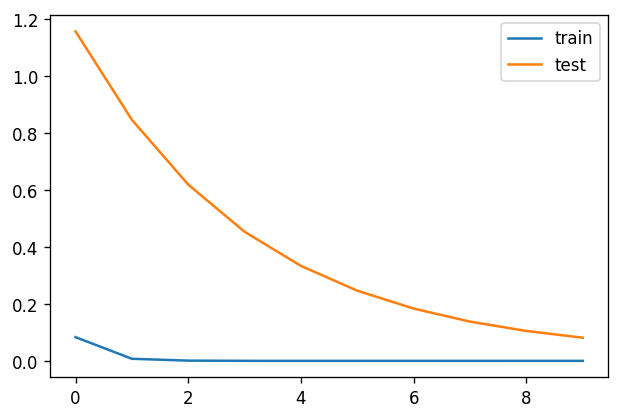

('learned w[:10]:', 
 [[ 0.01386711]
  [ 0.01061704]
  [ 0.00735863]
  [ 0.04146164]
  [-0.00724841]
  [ 0.02792866]
  [ 0.04090498]
  [-0.00623219]
  [ 0.00752071]
  [-0.03201589]]
 <NDArray 10x1 @cpu(0)>, 'learend b:', 
 [-0.00079867]
 <NDArray 1 @cpu(0)>)

In [9]:

train(2)

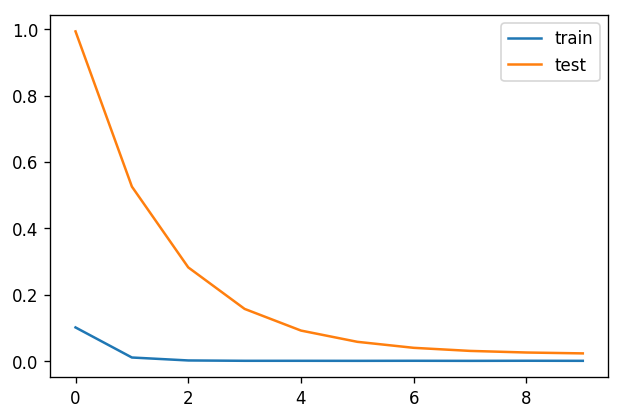

('learned w[:10]:', 
 [[-0.0036612 ]
  [ 0.00330373]
  [-0.00160205]
  [ 0.0055751 ]
  [-0.00304921]
  [-0.00521724]
  [ 0.00027427]
  [ 0.00206331]
  [ 0.00251757]
  [ 0.00896391]]
 <NDArray 10x1 @cpu(0)>, 'learend b:', 
 [-0.00013449]
 <NDArray 1 @cpu(0)>)

In [10]:

train(4)